In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import VGG16
from efficientnet.tfkeras import EfficientNetB5
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model


import numpy as np
import random
import cv2
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

# Process the data, normalize it, reshape it, and one-hot-encode the labels
img_rows, img_cols, channels = 28, 28, 1
num_classes = 10

x_train = x_train / 255
x_test = x_test / 255

# x_train = x_train.reshape((-1, img_rows, img_cols, channels))
# x_test = x_test.reshape((-1, img_rows, img_cols, channels))

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


print("Data shapes", x_test.shape, y_test.shape, x_train.shape, y_train.shape)

Data shapes (10000, 28, 28) (10000, 10) (60000, 28, 28) (60000, 10)


In [3]:
train_images = np.load('train_images_60000_224_224_3.npy')
test_images = np.load('test_images_10000_224_224_3.npy')
train_labels = y_train
test_labels = y_test

In [4]:
# target_size = (224, 224) 
# exmaple_counts = 100
# exmaple_counts = x_train.shape[0]
# x_train = x_train[:exmaple_counts, ...]
# y_train = y_train[:exmaple_counts, ...]
# train_images = np.array([cv2.resize(img, target_size, interpolation=cv2.INTER_LINEAR) for img in x_train])
# train_images = np.stack((train_images,) * 3, axis=-1)
# train_labels = y_train

# plot_counts = 5
# fig, axes = plt.subplots(1, plot_counts, figsize=(12, 8)) 
# for index, img in enumerate(train_images[:plot_counts, ...]):
#     print(img.shape)
#     ax = axes[index]
#     # Plot the image on the subplot
#     ax.imshow(img)
#     ax.axis('off')
# plt.show()
# print(train_labels[:plot_counts, ...])

In [5]:
# test_counts = 50
# test_counts = x_test.shape[0]
# test_images = x_test[:test_counts, ...]
# test_labels = y_test[:test_counts, ...]

# test_images = np.array([cv2.resize(img, target_size, interpolation=cv2.INTER_LINEAR) for img in test_images])
# test_images = np.stack((test_images,) * 3, axis=-1)

In [ ]:
# save_path = f"train_images_{'_'.join(list(str(num) for num in train_images.shape))}.npy"
# print(save_path)
# np.save(save_path, train_images)

# save_path = f"test_images_{'_'.join(list(str(num) for num in test_images.shape))}.npy"
# print(save_path)
# np.save(save_path, test_images)


In [7]:
# Load the pre-trained VGG16 model without the top classification layer
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers to prevent further training
for layer in vgg_model.layers:
    layer.trainable = False

# Add your own classification layers on top of the pre-trained model
mnist_vgg16_model = tf.keras.Sequential([
    vgg_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Replace num_classes with the number of your classes
])

# Compile and train your model
mnist_vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [8]:
mnist_vgg16_model.fit(train_images, train_labels, epochs=20, batch_size=32)



: 

: 

In [ ]:
test_loss, test_accuracy = mnist_vgg16_model.evaluate(x=test_images, y=test_labels, verbose=0)
print(f'mnist_vgg16_model - Test loss: {test_loss}. Test Accuracy: {test_accuracy}')

# save model
mnist_vgg16_model.save('saved_models/mnist_vgg16_model.h5')
print('mnist_vgg16_model Model Saved!')

# save model
mnist_vgg16_model.save_weights('saved_models/mnist_vgg16_weights.h5')
print('mnist_vgg16_model Weights Saved!')

mnist_vgg16_model - Test loss: 0.4710736572742462. Test Accuracy: 0.8799999952316284
mnist_vgg16_model Model Saved!
mnist_vgg16_model Weights Saved!


In [ ]:
# Load pre-trained EfficientNet-B0 model
effnet_model = EfficientNetB5(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
effnet_model.trainable = False

# Add your own classification layers on top of the pre-trained model
mnist_effnetB5_model = tf.keras.Sequential([
    effnet_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Replace num_classes with the number of your classes
])

# Compile and train your model
mnist_effnetB5_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
mnist_effnetB5_model.fit(train_images, train_labels, epochs=60, batch_size=32)

Epoch 1/35
4/4 [==============================] - 15s 2s/step - loss: 38.4527 - accuracy: 0.1000
Epoch 2/35
4/4 [==============================] - 9s 2s/step - loss: 76.4411 - accuracy: 0.2700
Epoch 3/35
4/4 [==============================] - 9s 2s/step - loss: 40.9526 - accuracy: 0.2700
Epoch 4/35
4/4 [==============================] - 7s 2s/step - loss: 27.7132 - accuracy: 0.3400
Epoch 5/35
4/4 [==============================] - 6s 1s/step - loss: 24.0303 - accuracy: 0.4300
Epoch 6/35
4/4 [==============================] - 9s 2s/step - loss: 11.8465 - accuracy: 0.6000
Epoch 7/35
4/4 [==============================] - 8s 2s/step - loss: 7.6139 - accuracy: 0.5900
Epoch 8/35
4/4 [==============================] - 6s 2s/step - loss: 5.7463 - accuracy: 0.6800
Epoch 9/35
4/4 [==============================] - 8s 2s/step - loss: 9.1784 - accuracy: 0.6100
Epoch 10/35
4/4 [==============================] - 7s 2s/step - loss: 3.3419 - accuracy: 0.7700
Epoch 11/35
4/4 [=========================

In [ ]:
test_loss, test_accuracy = mnist_effnetB5_model.evaluate(x=test_images, y=test_labels, verbose=0)
print(f'mnist_effnetB5_model - Test loss: {test_loss}. Test Accuracy: {test_accuracy}')


# save model
mnist_effnetB5_model.save('saved_models/mnist_effnetB5_model.h5')
print('mnist_effnetB5_model Model Saved!')

# save model
mnist_effnetB5_model.save_weights('saved_models/mnist_effnetB5_weights.h5')
print('mnist_effnetB5_model Weights Saved!')

mnist_effnetB5_model - Test loss: 1.6613155603408813. Test Accuracy: 0.800000011920929
mnist_effnetB5_model Model Saved!
mnist_effnetB5_model Weights Saved!


In [1]:
from cleverhans.tf2.attacks.projected_gradient_descent import projected_gradient_descent
from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method


In [3]:
# load model
mnist_vgg16_model=load_model('saved_models/mnist_vgg16_model.h5')
mnist_vgg16_model.summary()
print('mnist_vgg16_model Model Loaded!')

mnist_effnetB5_model=load_model('saved_models/mnist_effnetB5_model.h5')
mnist_effnetB5_model.summary()
print('mnist_effnetB5_model Model Loaded!')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 21140042 (80.64 MB)
Trainable params: 6425354 (24.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
mnist_vgg16_model Model Loaded!
Model: "sequential_2"
_________________________________________________________________
 Layer (type)        

In [4]:
eps = 0.5
test_images_fgsm_mnist_vgg16_model = fast_gradient_method(mnist_vgg16_model, test_images, eps, np.inf)
test_images_fgsm_mnist_effnetB5_model = fast_gradient_method(mnist_effnetB5_model, test_images, eps, np.inf)

NameError: name 'test_images' is not defined

In [ ]:
test_loss, test_accuracy = mnist_vgg16_model.evaluate(x=test_images, y=test_labels, verbose=0)
print(f'mnist_vgg16_model on orignial data - Test loss: {test_loss}. Test Accuracy: {test_accuracy}')

test_loss_fgsm, test_accuracy_fgsm = mnist_vgg16_model.evaluate(x=test_images_fgsm_mnist_vgg16_model, y=test_labels, verbose=0)
print(f'mnist_vgg16_model on self-generated FGSM attrack data - Test loss: {test_loss}. Test Accuracy: {test_accuracy}')

test_loss_fgsm, test_accuracy_fgsm = mnist_vgg16_model.evaluate(x=test_images_fgsm_mnist_effnetB5_model, y=test_labels, verbose=0)
print(f'mnist_vgg16_model on effnet generated FGSM attrack data - Test loss: {test_loss}. Test Accuracy: {test_accuracy}')

mnist_vgg16_model on orignial data - Test loss: 0.4710736572742462. Test Accuracy: 0.8799999952316284
mnist_vgg16_model on self-generated FGSM attrack data - Test loss: 0.4710736572742462. Test Accuracy: 0.8799999952316284
mnist_vgg16_model on effnet generated FGSM attrack data - Test loss: 0.4710736572742462. Test Accuracy: 0.8799999952316284


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


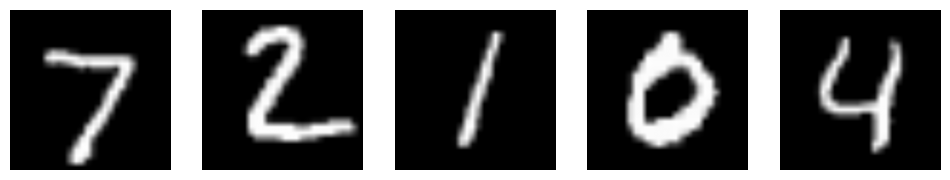

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
plot_counts = 5
fig, axes = plt.subplots(1, plot_counts, figsize=(12, 8)) 
for index, img in enumerate(test_images[:plot_counts, ...]):
    print(img.shape)
    ax = axes[index]
    # Plot the image on the subplot
    ax.imshow(img)
    ax.axis('off')
plt.show()
print(train_labels[:5, ...])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


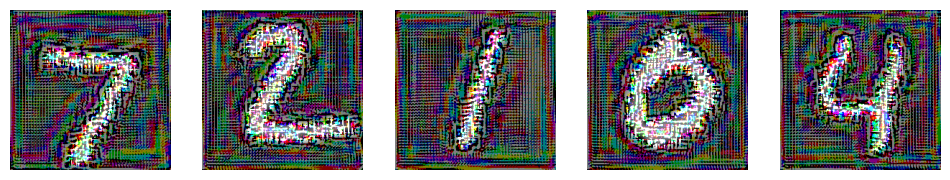

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
plot_counts = 5
fig, axes = plt.subplots(1, plot_counts, figsize=(12, 8)) 
for index, img in enumerate(test_images_fgsm_mnist_vgg16_model[:plot_counts, ...]):
    print(img.shape)
    ax = axes[index]
    # Plot the image on the subplot
    ax.imshow(img)
    ax.axis('off')
plt.show()
print(train_labels[:5, ...])

In [ ]:
test_loss, test_accuracy = mnist_effnetB5_model.evaluate(x=test_images, y=test_labels, verbose=0)
print(f'test_images_fgsm_mnist_effnetB5_model on orignial data - Test loss: {test_loss}. Test Accuracy: {test_accuracy}')

test_loss_fgsm, test_accuracy_fgsm = mnist_effnetB5_model.evaluate(x=test_images_fgsm_mnist_effnetB5_model, y=test_labels, verbose=0)
print(f'test_images_fgsm_mnist_effnetB5_model on self-generated FGSM attrack data - Test loss: {test_loss}. Test Accuracy: {test_accuracy}')

test_loss_fgsm, test_accuracy_fgsm = mnist_effnetB5_model.evaluate(x=test_images_fgsm_mnist_vgg16_model, y=test_labels, verbose=0)
print(f'test_images_fgsm_mnist_effnetB5_model on effnet generated FGSM attrack data - Test loss: {test_loss}. Test Accuracy: {test_accuracy}')

test_images_fgsm_mnist_effnetB5_model on orignial data - Test loss: 1.6613155603408813. Test Accuracy: 0.800000011920929
test_images_fgsm_mnist_effnetB5_model on self-generated FGSM attrack data - Test loss: 1.6613155603408813. Test Accuracy: 0.800000011920929
test_images_fgsm_mnist_effnetB5_model on effnet generated FGSM attrack data - Test loss: 1.6613155603408813. Test Accuracy: 0.800000011920929


In [65]:
import tensorflow as tf

# Define input tensor
input_tensor = tf.constant([[1,2],[3,4]])  # (batch_size, height, width, channels)
print(input_tensor)
filter = tf.constant([[1,1,1],[0,0,0],[-1,-1,-1]]) 
print(filter)

# Define transpose convolution parameters
kernel_size = 3
stride = 2
padding = 'SAME'
output_channels = 3  # Number of filters in the transpose convolution

# Define the transpose convolution layer
transpose_conv = tf.nn.conv2d_transpose(
    input_tensor,
    filters=filter,
    output_shape=[6,6],  # Output shape of the transpose convolution
    strides=stride,
    padding=padding
)

# # Print the shape of the output
# print(transpose_conv.shape)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]], shape=(3, 3), dtype=int32)


InvalidArgumentError: {{function_node __wrapped__Conv2DBackpropInput_device_/job:localhost/replica:0/task:0/device:CPU:0}} input_sizes must be 4-dimensional, got: 2 [Op:Conv2DBackpropInput]

In [69]:
import tensorflow as tf

# Define the input tensor
input_tensor = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
input_tensor = tf.reshape(input_tensor, [1, 2, 2, 1])  # Reshape to match (batch_size, height, width, channels)

# Define the filter tensor
filter_tensor = tf.constant([[1,1,1],[0,0,0],[-1,-1,-1]], dtype=tf.float32)
filter_tensor = tf.reshape(filter_tensor, [3, 3, 1, 1])  # Reshape to match (filter_height, filter_width, in_channels, out_channels)

# Perform the transpose convolution
output_tensor = tf.nn.conv2d_transpose(
    input_tensor,
    filter_tensor,
    output_shape=[1, 6, 6, 1],  # Output shape of the transpose convolution
    strides=[1, 2, 2, 1],
    padding='VALID'
)

# Print the output tensor
print(output_tensor.shape)

(1, 6, 6, 1)


In [71]:
output_tensor[0, 4, 2, 0]

<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>

In [ ]:
import tensorflow as tf

def pgd_attack(model, x, y, epsilon=0.01, alpha=0.01, num_iterations=10):
    """
    Perform PGD attack with multiple iterations on the input x.
    
    Args:
    - model: The target model to be attacked.
    - x: The input example to be perturbed.
    - y: The true label of the input example.
    - epsilon: The maximum magnitude of perturbation.
    - alpha: The step size for each iteration.
    - num_iterations: The number of iterations for the attack.
    
    Returns:
    - adversarial example (perturbed input)
    """
    x_adv = tf.identity(x)  # Initialize the adversarial example as the original input

    for _ in range(num_iterations):
        with tf.GradientTape() as tape:
            tape.watch(x_adv)
            predictions = model(x_adv)
            loss = tf.keras.losses.sparse_categorical_crossentropy(y, predictions)
        
        # Compute the gradient of the loss with respect to the input
        gradient = tape.gradient(loss, x_adv)
        
        # Normalize the gradient
        normed_gradient = tf.sign(gradient)
        
        # Add perturbation to the input
        x_adv = x_adv + alpha * normed_gradient
        
        # Clip the perturbed input to ensure it stays within epsilon
        x_adv = tf.clip_by_value(x_adv, x - epsilon, x + epsilon)
        x_adv = tf.clip_by_value(x_adv, 0, 1)  # Ensure pixel values are within [0, 1]
    
    return x_adv

# Usage example
# Assuming you have a pre-trained model and an input example x and its corresponding true label y
model = tf.keras.applications.ResNet50(weights='imagenet')
x = ...  # Input example
y = ...  # True label

adversarial_example = pgd_attack(model, x, y, epsilon=0.03, alpha=0.01, num_iterations=10)


In [ ]:
import tensorflow as tf

def fgsm_attack(model, x, y, epsilon=0.01):
    """
    Perform FGSM attack on the input x.
    
    Args:
    - model: The target model to be attacked.
    - x: The input example to be perturbed.
    - y: The true label of the input example.
    - epsilon: The magnitude of perturbation.
    
    Returns:
    - adversarial example (perturbed input)
    """
    with tf.GradientTape() as tape:
        tape.watch(x)
        predictions = model(x)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y, predictions)
    
    # Compute the gradient of the loss with respect to the input
    gradient = tape.gradient(loss, x)
    
    # Normalize the gradient
    signed_grad = tf.sign(gradient)
    
    # Create the adversarial example by adding the perturbation
    x_adv = x + epsilon * signed_grad
    
    # Clip the adversarial example to ensure it stays within a valid range
    x_adv = tf.clip_by_value(x_adv, 0, 1)
    
    return x_adv

# Usage example
# Assuming you have a pre-trained model and an input example x and its corresponding true label y
model = tf.keras.applications.ResNet50(weights='imagenet')
x = ...  # Input example
y = ...  # True label

adversarial_example = fgsm_attack(model, x, y, epsilon=0.01)
